In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [73]:
data=pd.read_csv('LoansData.csv')
data.head()

,LoanID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,1,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,2,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,3,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,4,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,5,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   LoanID                          2500 non-null   int64  
 1   Amount.Requested                2499 non-null   float64
 2   Amount.Funded.By.Investors      2499 non-null   float64
 3   Interest.Rate                   2498 non-null   object 
 4   Loan.Length                     2500 non-null   object 
 5   Loan.Purpose                    2500 non-null   object 
 6   Debt.To.Income.Ratio            2499 non-null   object 
 7   State                           2500 non-null   object 
 8   Home.Ownership                  2499 non-null   object 
 9   Monthly.Income                  2499 non-null   float64
 10  FICO.Range                      2498 non-null   object 
 11  Open.CREDIT.Lines               2497 non-null   float64
 12  Revolving.CREDIT.Balance        24

In [75]:
#Data Manipulation - Changing the data types of variables
data.columns= [col.strip().replace('.', '_') for col in data.columns]

data['Interest_Rate'] = data['Interest_Rate'].apply(lambda x: float(str(x).replace('%','')))
data['Loan_Length'] = data['Loan_Length'].apply(lambda x: float(str(x).replace(' months','')))
data['Debt_To_Income_Ratio'] = data['Debt_To_Income_Ratio'].apply(lambda x: float(str(x).replace('%','')))

data[['Fico_low','Fico_high']] = data['FICO_Range'].str.split('-', expand=True)
data['Fico_avg'] = (data.Fico_low.astype('float')+data.Fico_high.astype('float'))/2

data['Employment_Length'] = data['Employment_Length'].apply(lambda x: str(x).replace('< ',''))
data['Employment_Length'] = data['Employment_Length'].apply(lambda x: str(x).replace('+',''))
data['Employment_Length'] = data['Employment_Length'].apply(lambda x: str(x).replace(' years',''))
data['Employment_Length'] = data['Employment_Length'].apply(lambda x: float(str(x).replace(' year','')))

In [76]:
data.head()

,LoanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_low,Fico_high,Fico_avg
0,1,20000.0,20000.0,8.90,36.0,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,1.0,735,739,737.0
1,2,19200.0,19200.0,12.12,36.0,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2.0,715,719,717.0
2,3,35000.0,35000.0,21.98,60.0,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2.0,690,694,692.0
3,4,10000.0,9975.0,9.99,36.0,debt_consolidation,14.30,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5.0,695,699,697.0
4,5,12000.0,12000.0,11.71,36.0,credit_card,18.78,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9.0,695,699,697.0


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   LoanID                          2500 non-null   int64  
 1   Amount_Requested                2499 non-null   float64
 2   Amount_Funded_By_Investors      2499 non-null   float64
 3   Interest_Rate                   2498 non-null   float64
 4   Loan_Length                     2500 non-null   float64
 5   Loan_Purpose                    2500 non-null   object 
 6   Debt_To_Income_Ratio            2499 non-null   float64
 7   State                           2500 non-null   object 
 8   Home_Ownership                  2499 non-null   object 
 9   Monthly_Income                  2499 non-null   float64
 10  FICO_Range                      2498 non-null   object 
 11  Open_CREDIT_Lines               2497 non-null   float64
 12  Revolving_CREDIT_Balance        24

In [78]:
data = data.drop(['Fico_low', 'Fico_high', 'FICO_Range', 'Amount_Funded_By_Investors'], axis=1)

In [79]:
def missing_value_treat(x):
    if ((x.dtype=='float') or (x.dtype=='int')):
        x[x==999] = np.nan
        x=x.fillna(x.median())
    else:
        x[x=='unknown'] = np.nan
        x=x.fillna(x.mode()[0])
        
    return x

In [80]:
def outlier_treat(x):
    if ((x.dtype=='float') or (x.dtype=='int')):
        x= x.clip(lower = x.quantile(0.01), upper=x.quantile(0.99))
    else:
        x
    return x

In [81]:
data

,LoanID,Amount_Requested,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_avg
0,1,20000.0,8.90,36.0,debt_consolidation,14.90,SC,MORTGAGE,6541.67,14.0,14272.0,2.0,1.0,737.0
1,2,19200.0,12.12,36.0,debt_consolidation,28.36,TX,MORTGAGE,4583.33,12.0,11140.0,1.0,2.0,717.0
2,3,35000.0,21.98,60.0,debt_consolidation,23.81,CA,MORTGAGE,11500.00,14.0,21977.0,1.0,2.0,692.0
3,4,10000.0,9.99,36.0,debt_consolidation,14.30,KS,MORTGAGE,3833.33,10.0,9346.0,0.0,5.0,697.0
4,5,12000.0,11.71,36.0,credit_card,18.78,NJ,RENT,3195.00,11.0,14469.0,0.0,9.0,697.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,30000.0,16.77,60.0,debt_consolidation,19.23,NY,MORTGAGE,9250.00,15.0,45880.0,1.0,8.0,707.0
2496,2497,16000.0,14.09,60.0,home_improvement,21.54,MD,OWN,8903.25,18.0,18898.0,1.0,10.0,742.0
2497,2498,10000.0,13.99,36.0,debt_consolidation,4.89,PA,MORTGAGE,2166.67,4.0,4544.0,0.0,10.0,682.0
2498,2499,6000.0,12.42,36.0,major_purchase,16.66,NJ,RENT,3500.00,8.0,7753.0,0.0,5.0,677.0


In [82]:
data = data.apply(missing_value_treat)
data = data.apply(outlier_treat)

c:\users\suhet\appdata\local\programs\python\python36\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
c:\users\suhet\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\suhet\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports un

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   LoanID                          2500 non-null   int64  
 1   Amount_Requested                2500 non-null   float64
 2   Interest_Rate                   2500 non-null   float64
 3   Loan_Length                     2500 non-null   float64
 4   Loan_Purpose                    2500 non-null   object 
 5   Debt_To_Income_Ratio            2500 non-null   float64
 6   State                           2500 non-null   object 
 7   Home_Ownership                  2500 non-null   object 
 8   Monthly_Income                  2500 non-null   float64
 9   Open_CREDIT_Lines               2500 non-null   float64
 10  Revolving_CREDIT_Balance        2500 non-null   float64
 11  Inquiries_in_the_Last_6_Months  2500 non-null   float64
 12  Employment_Length               25

In [84]:
data.head()

,LoanID,Amount_Requested,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_avg
0,1,20000.0,8.90,36.0,debt_consolidation,14.90,SC,MORTGAGE,6541.67,14.0,14272.0,2.0,1.0,737.0
1,2,19200.0,12.12,36.0,debt_consolidation,28.36,TX,MORTGAGE,4583.33,12.0,11140.0,1.0,2.0,717.0
2,3,35000.0,21.98,60.0,debt_consolidation,23.81,CA,MORTGAGE,11500.00,14.0,21977.0,1.0,2.0,692.0
3,4,10000.0,9.99,36.0,debt_consolidation,14.30,KS,MORTGAGE,3833.33,10.0,9346.0,0.0,5.0,697.0
4,5,12000.0,11.71,36.0,credit_card,18.78,NJ,RENT,3195.00,11.0,14469.0,0.0,9.0,697.0


In [85]:
cat_vars = data.dtypes[data.dtypes.values == 'O'].keys()

In [86]:
cat_vars

Index(['Loan_Purpose', 'State', 'Home_Ownership'], dtype='object')

In [87]:
num_var = data.dtypes[((data.dtypes.values == 'int64') | (data.dtypes.values == 'float64'))].keys()

In [88]:
num_var

Index(['LoanID', 'Amount_Requested', 'Interest_Rate', 'Loan_Length',
       'Debt_To_Income_Ratio', 'Monthly_Income', 'Open_CREDIT_Lines',
       'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months',
       'Employment_Length', 'Fico_avg'],
      dtype='object')

In [89]:
data_final = pd.get_dummies(data, columns=cat_vars, drop_first=True)

In [90]:
data_final

,LoanID,Amount_Requested,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,...,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Home_Ownership_NONE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT
0,1,20000.0,8.90,36.0,14.90,6541.67,14.0,14272.0,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,2,19200.0,12.12,36.0,28.36,4583.33,12.0,11140.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,3,35000.0,21.98,60.0,23.81,11500.00,14.0,21977.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,4,10000.0,9.99,36.0,14.30,3833.33,10.0,9346.0,0.0,5.0,...,0,0,0,0,0,0,0,0,0,0
4,5,12000.0,11.71,36.0,18.78,3195.00,11.0,14469.0,0.0,9.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,30000.0,16.77,60.0,19.23,9250.00,15.0,45880.0,1.0,8.0,...,0,0,0,0,0,0,0,0,0,0
2496,2497,16000.0,14.09,60.0,21.54,8903.25,18.0,18898.0,1.0,10.0,...,0,0,0,0,0,0,0,0,1,0
2497,2498,10000.0,13.99,36.0,4.89,2166.67,4.0,4544.0,0.0,10.0,...,0,0,0,0,0,0,0,0,0,0
2498,2499,6000.0,12.42,36.0,16.66,3500.00,8.0,7753.0,0.0,5.0,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:>

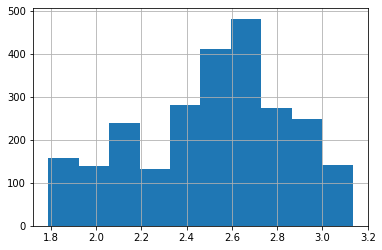

In [91]:
#Assumptions of Regression
np.log(data_final.Interest_Rate).hist()

c:\users\suhet\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Interest_Rate', ylabel='Density'>

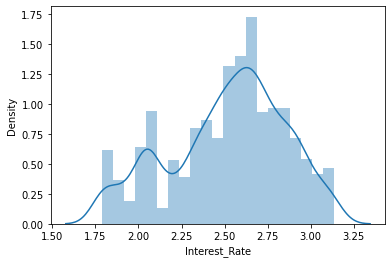

In [92]:
# Distribution of variables
import seaborn as sns
sns.distplot(np.log(data_final.Interest_Rate))

In [93]:
data_final["ln_Interest_Rate"]= np.log(data_final["Interest_Rate"])

c:\users\suhet\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ln_Interest_Rate', ylabel='Density'>

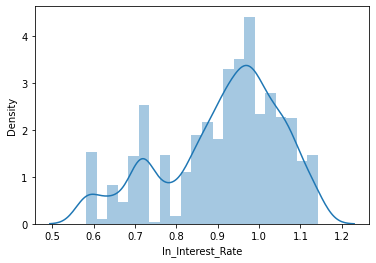

In [94]:
sns.distplot(np.log(data_final.ln_Interest_Rate))

In [96]:
#Feature Selection
#Correlation
corr = data_final.corr()['ln_Interest_Rate']
corr.to_csv('corr1.csv')

In [97]:
list_var_corr=[
'Loan_Length',
'Amount_Requested',
'Debt_To_Income_Ratio',
'Inquiries_in_the_Last_6_Months',
'Loan_Purpose_debt_consolidation',
'Loan_Purpose_major_purchase',
'Fico_avg'
]

In [102]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 74 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   LoanID                           2500 non-null   int64  
 1   Amount_Requested                 2500 non-null   float64
 2   Interest_Rate                    2500 non-null   float64
 3   Loan_Length                      2500 non-null   float64
 4   Debt_To_Income_Ratio             2500 non-null   float64
 5   Monthly_Income                   2500 non-null   float64
 6   Open_CREDIT_Lines                2500 non-null   float64
 7   Revolving_CREDIT_Balance         2500 non-null   float64
 8   Inquiries_in_the_Last_6_Months   2500 non-null   float64
 9   Employment_Length                2500 non-null   float64
 10  Fico_avg                         2500 non-null   float64
 11  Loan_Purpose_credit_card         2500 non-null   uint8  
 12  Loan_Purpose_debt_co

In [104]:
# Feature Selection based on importance
features = data_final[data_final.columns.difference(['ln_Interest_Rate', 'Interest_Rate'])]
target = data_final['ln_Interest_Rate']

from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression( features, target )

In [105]:
f_reg_results = pd.concat([pd.Series(features.columns), pd.Series(F_values), pd.Series(p_values)], axis=1)
f_reg_results.columns = ['features', 'f_value', 'p_value']

f_reg_results.sort_values(by='f_value', ascending=False, inplace=True)

f_reg_results

,features,f_value,p_value
3,Fico_avg,3100.706573,0.000000e+00
10,Loan_Length,438.264400,8.549505e-90
0,Amount_Requested,250.655568,7.129766e-54
1,Debt_To_Income_Ratio,82.470669,2.121676e-19
8,Inquiries_in_the_Last_6_Months,81.193336,3.966925e-19
...,...,...,...
15,Loan_Purpose_house,0.025230,8.738076e-01
40,State_IN,0.022821,8.799364e-01
61,State_RI,0.015368,9.013516e-01
27,State_AL,0.002622,9.591696e-01


In [106]:
f_reg_features = f_reg_results[f_reg_results.p_value<0.05]
f_reg_features

,features,f_value,p_value
3,Fico_avg,3100.706573,0.000000e+00
10,Loan_Length,438.264400,8.549505e-90
0,Amount_Requested,250.655568,7.129766e-54
1,Debt_To_Income_Ratio,82.470669,2.121676e-19
8,Inquiries_in_the_Last_6_Months,81.193336,3.966925e-19
12,Loan_Purpose_debt_consolidation,45.367333,2.019960e-11
16,Loan_Purpose_major_purchase,31.625414,2.077637e-08
14,Loan_Purpose_home_improvement,24.090299,9.784422e-07
7,Home_Ownership_RENT,18.614306,1.662375e-05
26,Revolving_CREDIT_Balance,16.008023,6.490883e-05


In [107]:
list_f_reg = list(f_reg_features.features)

In [108]:
list_f_reg

['Fico_avg',
 'Loan_Length',
 'Amount_Requested',
 'Debt_To_Income_Ratio',
 'Inquiries_in_the_Last_6_Months',
 'Loan_Purpose_debt_consolidation',
 'Loan_Purpose_major_purchase',
 'Loan_Purpose_home_improvement',
 'Home_Ownership_RENT',
 'Revolving_CREDIT_Balance',
 'Open_CREDIT_Lines',
 'State_MI',
 'Loan_Purpose_medical',
 'State_HI',
 'State_VT']

In [115]:
#The best feature reduction technique (RF)
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

rfe = RFE(RandomForestRegressor(), n_features_to_select=7)
rfe = rfe.fit(features, target)

list_rfe = list(features.columns[rfe.get_support()])
list_rfe.remove('LoanID')
list_rfe

['Amount_Requested',
 'Debt_To_Income_Ratio',
 'Fico_avg',
 'Loan_Length',
 'Open_CREDIT_Lines',
 'Revolving_CREDIT_Balance']

In [116]:
#Final Features
consider = list(set(list_var_corr+list_f_reg + list_rfe))

In [117]:
consider

['Fico_avg',
 'Amount_Requested',
 'Loan_Purpose_home_improvement',
 'Loan_Purpose_major_purchase',
 'Revolving_CREDIT_Balance',
 'Open_CREDIT_Lines',
 'Loan_Purpose_medical',
 'State_MI',
 'Home_Ownership_RENT',
 'State_HI',
 'State_VT',
 'Debt_To_Income_Ratio',
 'Inquiries_in_the_Last_6_Months',
 'Loan_Purpose_debt_consolidation',
 'Loan_Length']

In [118]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_new = features[consider]

In [120]:
X = X_new[X_new.columns.difference(['Loan_Length'])]

vif_values = pd.concat([pd.Series(X.columns), pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])])], axis=1)

vif_values.columns = ['feature', 'vif']
vif_values.sort_values(by= 'vif', ascending=False)

,feature,vif
2,Fico_avg,12.502844
9,Open_CREDIT_Lines,8.025011
1,Debt_To_Income_Ratio,6.182747
0,Amount_Requested,4.284643
10,Revolving_CREDIT_Balance,2.556830
5,Loan_Purpose_debt_consolidation,2.531979
3,Home_Ownership_RENT,2.006975
4,Inquiries_in_the_Last_6_Months,1.632288
6,Loan_Purpose_home_improvement,1.240634
7,Loan_Purpose_major_purchase,1.138357


In [123]:
#Splitting dataset into training and testing
from sklearn.model_selection import train_test_split

train, test = train_test_split( data_final, test_size = 0.3, random_state = 1234 )

In [124]:
print(len(train))
print(len(test))

1750
750


In [126]:
X.columns

Index(['Amount_Requested', 'Debt_To_Income_Ratio', 'Fico_avg',
       'Home_Ownership_RENT', 'Inquiries_in_the_Last_6_Months',
       'Loan_Purpose_debt_consolidation', 'Loan_Purpose_home_improvement',
       'Loan_Purpose_major_purchase', 'Loan_Purpose_medical',
       'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance', 'State_HI', 'State_MI',
       'State_VT'],
      dtype='object')

In [128]:
#Modelling
import statsmodels.formula.api as smf

formula = 'ln_Interest_Rate~'+'+'.join(X.columns)

In [129]:
ols_model = smf.ols(formula, data=train).fit()

In [130]:
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:       ln_Interest_Rate   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     293.3
Date:                Sat, 19 Jun 2021   Prob (F-statistic):               0.00
Time:                        15:27:50   Log-Likelihood:                 489.46
No. Observations:                1750   AIC:                            -948.9
Df Residuals:                    1735   BIC:                            -866.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [132]:
train['pred'] = pd.DataFrame(np.exp(ols_model.predict(train)))

c:\users\suhet\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [133]:
train.head()

,LoanID,Amount_Requested,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,...,State_WA,State_WI,State_WV,State_WY,Home_Ownership_NONE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT,ln_Interest_Rate,pred
42,43,5500.0,19.13,36.0,3.58,12000.00,3.0,0.0,1.0,8.0,...,0,0,0,0,0,0,0,1,2.951258,16.425484
108,109,10000.0,14.09,36.0,10.59,2916.67,9.0,10390.0,3.0,1.0,...,0,0,0,0,0,0,0,1,2.645465,14.440616
1577,1578,8000.0,7.90,36.0,8.91,3166.67,4.0,680.0,0.0,6.0,...,0,0,0,0,0,0,0,1,2.066863,7.757027
237,238,12375.0,13.67,36.0,22.42,2083.33,8.0,12226.0,0.0,3.0,...,0,0,0,0,0,0,0,0,2.615204,14.734746
1436,1437,3200.0,12.61,36.0,16.72,6476.00,14.0,80837.0,4.0,10.0,...,0,0,0,0,0,0,0,0,2.534490,14.506389


In [134]:
test['pred'] = pd.DataFrame(np.exp(ols_model.predict(test)))
test.head()

c:\users\suhet\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,LoanID,Amount_Requested,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,...,State_WA,State_WI,State_WV,State_WY,Home_Ownership_NONE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT,ln_Interest_Rate,pred
903,904,12500.0,9.32,36.0,11.71,4166.67,7.0,1052.0,0.0,2.0,...,0,0,0,0,0,0,0,0,2.232163,7.075288
674,675,2500.0,15.95,36.0,24.07,1500.00,10.0,2684.0,3.0,1.0,...,0,0,0,0,0,0,0,0,2.769459,16.094079
1624,1625,21700.0,15.31,36.0,13.93,5147.17,6.0,8795.0,2.0,5.0,...,0,0,0,0,0,0,0,0,2.728506,16.827086
1214,1215,21000.0,14.27,60.0,11.27,5333.33,8.0,19431.0,0.0,8.0,...,0,0,0,0,0,0,0,0,2.658159,13.575497
2164,2165,4400.0,5.99,36.0,17.93,4000.00,6.0,9945.0,1.0,5.0,...,0,0,0,0,0,0,1,0,1.790091,7.536215


In [135]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
import scipy.stats as stats

In [136]:
#Train Data
MAPE_train = np.mean(np.abs(train.Interest_Rate - train.pred)/train.Interest_Rate )
print(MAPE_train)


RMSE_train = metrics.mean_squared_error(train.Interest_Rate , train.pred)
print(RMSE_train)

Corr_train = stats.stats.pearsonr(train.Interest_Rate , train.pred)
print(Corr_train)


#Test Data
MAPE_test = np.mean(np.abs(test.Interest_Rate - test.pred)/test.Interest_Rate )
print(MAPE_test)

RMSE_test = metrics.mean_squared_error(test.Interest_Rate , test.pred)
print(RMSE_test)

Corr_test = stats.stats.pearsonr(test.Interest_Rate , test.pred)
print(Corr_test)

0.14280389797803192
5.15378605430721
(0.8386013825374722, 0.0)
0.144553486740144
4.789831574039126
(0.8502438746208854, 1.1818277761993284e-210)


<AxesSubplot:>

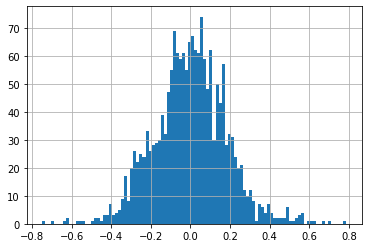

In [138]:
ols_model.resid.hist(bins=100)

In [139]:
#Decile analysis - Train

train['Deciles']=pd.qcut(train['pred'],10, labels=False)

avg_actual = train[['Deciles','Interest_Rate']].groupby(train.Deciles).mean().sort_index(ascending=False)['Interest_Rate']
avg_pred = train[['Deciles','pred']].groupby(train.Deciles).mean().sort_index(ascending=False)['pred']

Decile_analysis_train = pd.concat([avg_actual, avg_pred], axis=1)

Decile_analysis_train

c:\users\suhet\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Interest_Rate,pred
Deciles,,
9,19.330264,18.979382
8,16.774838,16.273554
7,15.602743,15.144488
6,14.770743,14.283668
5,13.876171,13.430433
4,12.835943,12.513967
3,11.232914,11.530523
2,10.104914,10.507860
1,8.885406,9.258309


In [140]:
#Decile analysis - Train
test['Deciles']=pd.qcut(test['pred'],10, labels=False)

avg_actual_test = test[['Deciles','Interest_Rate']].groupby(test.Deciles).mean().sort_index(ascending=False)['Interest_Rate']
avg_pred_test = test[['Deciles','pred']].groupby(test.Deciles).mean().sort_index(ascending=False)['pred']

Decile_analysis_test = pd.concat([avg_actual_test, avg_pred_test], axis=1)

Decile_analysis_test

c:\users\suhet\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Interest_Rate,pred
Deciles,,
9,19.213996,18.663094
8,16.856000,16.267083
7,15.208533,15.186379
6,14.490667,14.334422
5,13.368800,13.480933
4,12.824000,12.591456
3,11.562533,11.551743
2,9.868000,10.397919
1,8.661173,9.004699


In [141]:
#We are getting around 85% accuracy or 15% error.